# Scatter plots

Plus d'informations dans le README du dossier [courant](./).

## Imports nécessaires

In [1]:
from metrics.wallet import *
from common import *
import matplotlib.pyplot as plt

## Analyse importée!

In [2]:
analysis = import_analysis_from_file(ANALYSIS_09_MERGE_LIGHT)

In [3]:
def f(x):
    if 'impact' in x:
        return 'impact'
    if 'activity' in x:
        return 'activity'
    if 'domddeg' in x or 'ddegondom' in x:
        return 'ddegondom'
    if 'chsa' in x:
        return 'chs'
    if 'chs' in x:
        return 'chs'
    if 'cacd' in x:
        return 'cacd'

analysis = analysis.add_variable(
    'h',
    lambda x: f(x['old_experiment_ware'])
)

activity


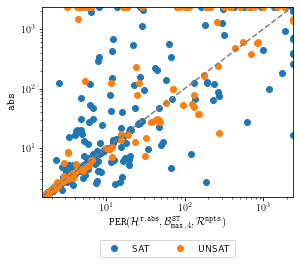

cacd


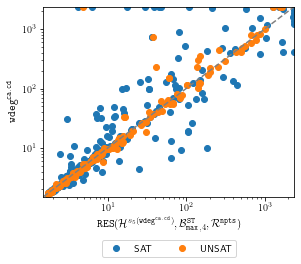

chs


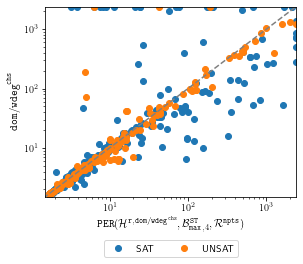

ddegondom


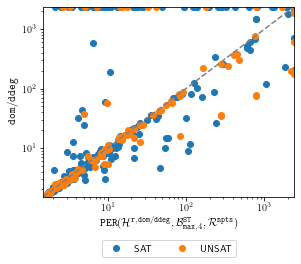

impact


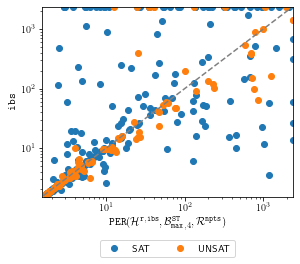

In [10]:
scatters = {
    'activity': ('$\\mathtt{abs}$', '$\\mathtt{PER}(\\mathcal{H}^{\\mathtt{r, abs}}, \\mathcal{B}^\\mathtt{ST}_{\\mathtt{max}, 4}, \\mathcal{R}^\\mathtt{npts})$'),
    'cacd': ('$\\mathtt{wdeg}^{\\mathtt{ca.cd}}$', '$\\mathtt{RES}(\\mathcal{H}^{s_5(\\mathtt{wdeg^\\mathtt{ca.cd}})}, \\mathcal{B}^\\mathtt{ST}_{\\mathtt{max}, 4}, \\mathcal{R}^\\mathtt{npts})$'),
    'chs': ('$\\mathtt{dom/wdeg}^{\\mathtt{chs}}$', '$\\mathtt{PER}(\\mathcal{H}^{\\mathtt{r, dom/wdeg}^\\mathtt{chs}}, \\mathcal{B}^\\mathtt{ST}_{\\mathtt{max}, 4}, \\mathcal{R}^\\mathtt{npts})$'),
    'ddegondom': ('$\\mathtt{dom/ddeg}$', '$\\mathtt{PER}(\\mathcal{H}^{\\mathtt{r, dom/ddeg}}, \\mathcal{B}^\\mathtt{ST}_{\\mathtt{max}, 4}, \\mathcal{R}^\\mathtt{npts})$'),
    'impact': ('$\\mathtt{ibs}$', '$\\mathtt{PER}(\\mathcal{H}^{\\mathtt{r, ibs}}, \\mathcal{B}^\\mathtt{ST}_{\\mathtt{max}, 4}, \\mathcal{R}^\\mathtt{npts})$'),
}

MAP_STATUS = {
    'UNSATISFIABLE': 'UNSAT',
    'SATISFIABLE': 'SAT',
}

for sub in analysis.groupby('h'):
    h = sub.data_frame.h.unique()[0]
    print(h)
    
    sub.add_variable(
        'status',
        lambda x: MAP_STATUS[x['status']] if x['status'] in MAP_STATUS else x['status']
    ).scatter_plot(
        scatters[h][1],
        scatters[h][0],
        scatter_col="cpu_time",
        title=None,

        color_col='status',
        x_min=1.5,
        x_max=2400,
        y_min=1.5,
        y_max=2400,
        logx=True,
        logy=True,

        figure_size=(4.5, 3.5),

        legend_location=Position.BOTTOM,
        legend_offset=(0, -.1),
        ncol_legend=2,

        title_font_name='Helvetica',
        title_font_color='#000000',
        latex_writing=True,
        output=f"fig/2B-{h}_cac.pdf",
        dynamic=False
    )
    
    plt.show()
    